In [4]:
!pip install keras tensorflow

In [5]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
# from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
url = ("https://raw.githubusercontent.com/CSfromCS/VHS-Thesis/0a668228516a615aa5ff9c047a1a05a5531d62ea/datatocsv2.csv")
df = pd.read_csv(url, parse_dates=True)
# rename column
df.rename(columns={'Time to Next': 'y'}, inplace=True)

# Extract feature and target arrays
X, y = df.drop('y', axis=1), df[['y']]

# get dummies
X = pd.get_dummies(X)

X = pd.get_dummies(X, columns=['Day of Week'])

#minmax all columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [7]:
X_train = pd.DataFrame(X_train)
X_test= pd.DataFrame(X_test)

In [8]:
encoding_dim = 15 
input_img = Input(shape=(20,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(20, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [9]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer='adam', loss="mse")


In [22]:
autoencoder.fit(X_train, X_train,
                epochs=500,
                batch_size=256,
                validation_data=(X_test, X_test))

Epoch 1/500
4/4 [==============================] - 0s 12ms/step - loss: 0.0650 - val_loss: 0.0642
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0640 - val_loss: 0.0632
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0630 - val_loss: 0.0623
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0620 - val_loss: 0.0613
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0610 - val_loss: 0.0604
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0600 - val_loss: 0.0594
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0590 - val_loss: 0.0585
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0581 - val_loss: 0.0577
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0572 - val_loss: 0.0568
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0563 - val_loss: 0.0560
Epoch 11/500
4/4 [==========

In [17]:
# Reshape a row in X_train to (4,5)
X_train.iloc[0].values.reshape(4,5)

array([[0.45964091, 0.45454545, 0.3559322 , 0.77142857, 0.72727273],
       [0.98815523, 0.39169517, 1.        , 0.5       , 0.        ],
       [0.88505064, 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ]])

In [24]:
# conver to dataframe
pd.DataFrame(decoded_img)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.373949,0.310267,0.913304,0.318462,0.278062,0.866464,0.420819,0.974271,0.543942,0.032717,0.920134,0.001795,0.036744,0.982287,0.002028,0.963258,0.003619,0.001240,0.011998,0.011262
1,0.642566,0.609382,0.736918,0.264016,0.605013,0.901551,0.744470,0.030334,0.968320,0.458169,0.220324,0.013550,0.976094,0.021688,0.021421,0.005572,0.982263,0.002945,0.020751,0.010748
2,0.247217,0.243708,0.323119,0.278068,0.679776,0.894535,0.396911,0.971603,0.524303,0.033420,0.908364,0.001609,0.035731,0.969956,0.004051,0.010440,0.002313,0.025170,0.975087,0.002977
3,0.769320,0.770424,0.245596,0.445408,0.866176,0.825756,0.144568,0.026403,0.436109,0.033493,0.300127,0.007658,0.008642,0.989238,0.017080,0.959360,0.009672,0.001968,0.006333,0.013090
4,0.681297,0.638846,0.724441,0.004152,0.180152,0.160278,0.862829,0.024720,0.533884,0.973068,0.396030,0.976154,0.018700,0.009468,0.023372,0.008704,0.014184,0.959458,0.022744,0.013930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.136787,0.128722,0.547736,0.332783,0.239801,0.864874,0.199908,0.022240,0.504860,0.031647,0.652223,0.002219,0.025256,0.981076,0.014690,0.014678,0.006543,0.014566,0.984094,0.003565
154,0.567188,0.540618,0.621294,0.005456,0.077256,0.882063,0.610252,0.987282,0.970544,0.468084,0.119924,0.013552,0.966237,0.047493,0.021047,0.006948,0.028034,0.956908,0.033711,0.018054
155,0.913659,0.889723,0.781971,0.941575,0.737951,0.660266,0.902301,0.962175,0.960804,0.550856,0.920196,0.026622,0.970206,0.003571,0.004232,0.007734,0.994123,0.000309,0.007053,0.000803
156,0.547023,0.536930,0.307140,0.748553,0.893226,0.860993,0.281299,0.978627,0.548023,0.031837,0.851665,0.002611,0.022240,0.966976,0.003253,0.009299,0.007832,0.007056,0.955951,0.000508


5/5 [==============================] - 0s 596us/step


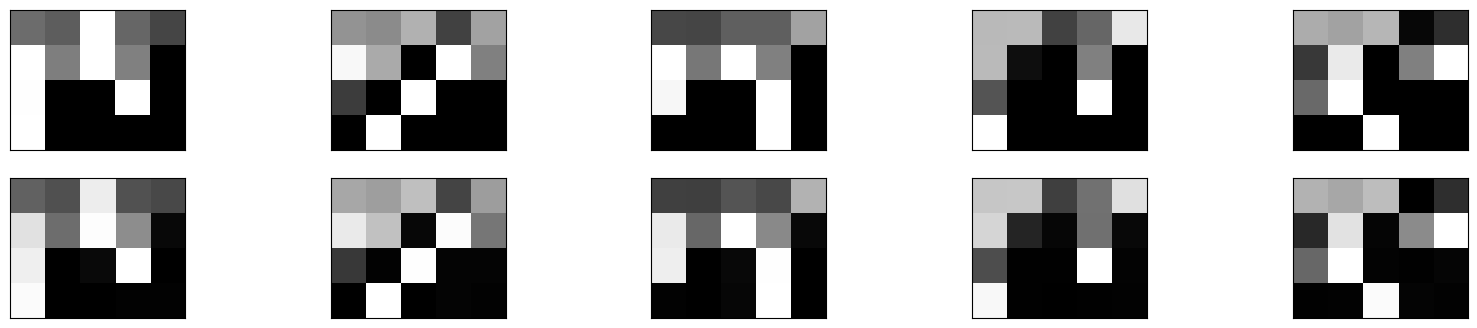

In [23]:
encoded_img = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape(4, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(4, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()